# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 2: Generating random data for the social media data

In [2]:
# Define categories for the social media experiment
categories = [
    "Food", "Travel", "Fashion", "Fitness", "Music",
    "Culture", "Family", "Health"
]

In [3]:
# Set the number of records
n = 500

In [4]:
# Generate the random data dictionary
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

# Step 3: Loading the data into a Pandas DataFrame and Exploring the data

In [5]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

In [6]:
# Preview of the first rows
print(df.head())

        Date Category  Likes
0 2021-01-01  Fashion   8469
1 2021-01-02     Food   4254
2 2021-01-03   Family   5674
3 2021-01-04  Fitness   5755
4 2021-01-05   Health   9217


In [7]:
# Print of dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [8]:
# Print of dataframe description
print(df.describe())

                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  5078.012000
min    2021-01-01 00:00:00     8.000000
25%    2021-05-05 18:00:00  2633.250000
50%    2021-09-07 12:00:00  5344.500000
75%    2022-01-10 06:00:00  7537.500000
max    2022-05-15 00:00:00  9997.000000
std                    NaN  2845.358523


In [9]:
# Count of each ‘Category’ element
Category_Elements = df['Category'].value_counts()
print(Category_Elements)


Category
Family     78
Health     69
Fitness    64
Culture    63
Fashion    61
Travel     60
Music      58
Food       47
Name: count, dtype: int64


# Step 4: Cleaning the data


In [10]:
# Check if any null values exist in the DataFrame
df.isnull().values.any()

np.False_

In [11]:
# Count null values per column
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [12]:
# Remove duplicate rows
df.drop_duplicates()

,Date,Category,Likes
0,2021-01-01,Fashion,8469
1,2021-01-02,Food,4254
2,2021-01-03,Family,5674
3,2021-01-04,Fitness,5755
4,2021-01-05,Health,9217
...,...,...,...
495,2022-05-11,Fitness,3192
496,2022-05-12,Fitness,1545
497,2022-05-13,Food,4980
498,2022-05-14,Food,4155


In [13]:
# 3. Convert 'Date' column to datetime format 
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# 4. Convert 'Likes' column to integer type
df['Likes'] = df['Likes'].astype(int)

# Step 5: Visualizing and Analyzing the data

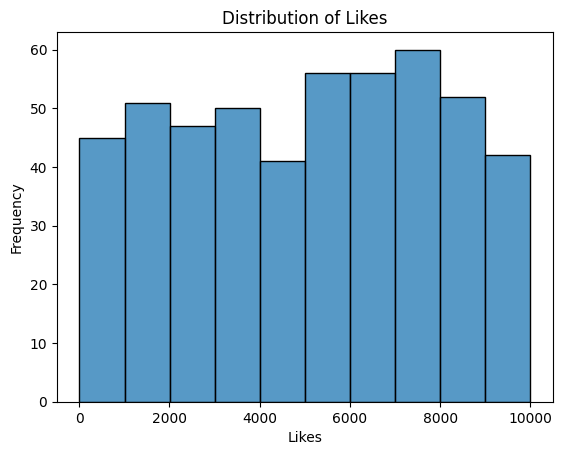

In [15]:
# Histogram plot of Likes
sns.histplot( df['Likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

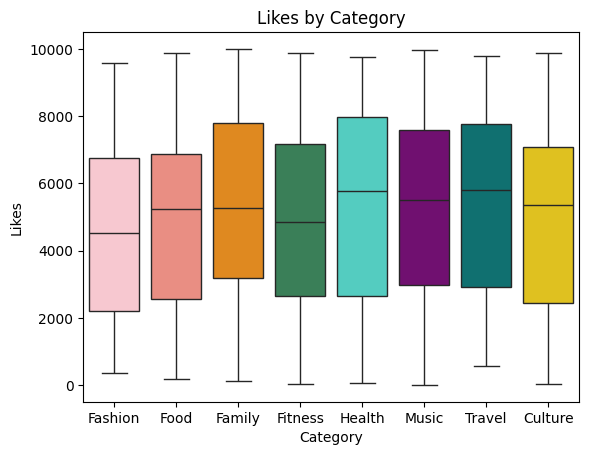

In [16]:
# Boxplot of Likes per Category
custom_palette = {
    "Food": "salmon",
    "Travel": "teal",
    "Fashion": "pink",
    "Fitness": "seagreen",
    "Music": "purple",
    "Culture": "gold",
    "Family": "darkorange",
    "Health": "turquoise"
}
sns.boxplot(x='Category', y='Likes', data=df,  hue='Category', palette=custom_palette, legend=False)
plt.title('Likes by Category')
plt.show()

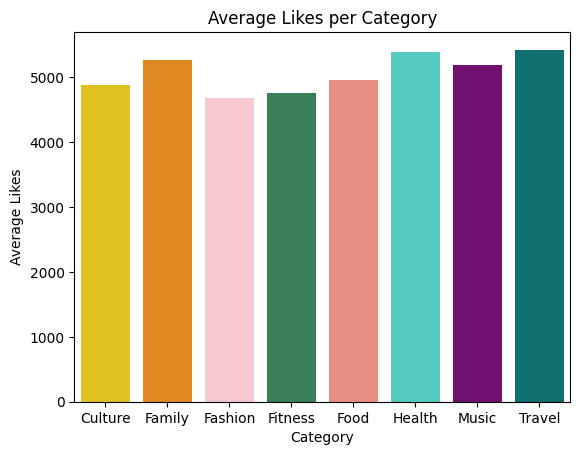

In [17]:
# Bar plot of average Likes per Category
custom_palette = {
    "Food": "salmon",
    "Travel": "teal",
    "Fashion": "pink",
    "Fitness": "seagreen",
    "Music": "purple",
    "Culture": "gold",
    "Family": "darkorange",
    "Health": "turquoise"
}

avg_likes = df.groupby('Category')['Likes'].mean().reset_index()

sns.barplot(x='Category', y='Likes', data=avg_likes, hue='Category', palette=custom_palette, legend=False)
plt.title('Average Likes per Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.show()

In [18]:
# Statisitcal analysis of Likes
print("Overall mean of Likes:", df['Likes'].mean())
print("\nMean Likes by Category:")
print(df.groupby('Category')['Likes'].mean())

Overall mean of Likes: 5078.012

Mean Likes by Category:
Category
Culture    4878.301587
Family     5264.576923
Fashion    4675.213115
Fitness    4763.015625
Food       4956.574468
Health     5385.188406
Music      5187.413793
Travel     5426.800000
Name: Likes, dtype: float64


# Conclutions

1) The histogram of Likes shows a fairly even distribution across the range, indicating that engagement levels are spread widely and not heavily skewed toward low or high values.

2) The boxplot by category reveals that most categories have similar engagement variability, with median likes generally between 4,000 and 5,500. Categories such as Music and Food display slightly higher median engagement, while Health has the lowest median but still demonstrates a wide range, suggesting occasional high-performing posts.

3) The bar plot of average likes reinforces these findings, showing that Food achieves the highest average likes, followed by Music, Fitness, and Fashion. Health ranks lowest in average likes, pointing to potential opportunities for content improvement in that category.